In [7]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

!pip install sklearn_som
from sklearn_som.som import SOM

import plotly.express as px
import plotly.graph_objects as go

In [8]:
df = pd.read_csv('Pokemon.csv')

In [9]:
df.head(10)

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,type1
0,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,grass
1,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,grass
2,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,grass
3,0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,fire
4,0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,fire
5,0.25,1.0,1.0,2.0,0.5,0.5,0.5,1.0,1.0,0.25,0.0,1.0,1.0,1.0,1.0,4.0,0.5,2.0,104,5120,fire
6,1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,2.00,1.0,0.5,1.0,1.0,1.0,1.0,0.5,0.5,48,5120,water
7,1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,2.00,1.0,0.5,1.0,1.0,1.0,1.0,0.5,0.5,63,5120,water
8,1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,2.00,1.0,0.5,1.0,1.0,1.0,1.0,0.5,0.5,103,5120,water
9,1.00,1.0,1.0,1.0,1.0,0.5,2.0,2.0,1.0,0.50,0.5,1.0,1.0,1.0,1.0,2.0,1.0,1.0,30,3840,bug


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   against_bug       600 non-null    float64
 1   against_dark      600 non-null    float64
 2   against_dragon    600 non-null    float64
 3   against_electric  600 non-null    float64
 4   against_fairy     600 non-null    float64
 5   against_fight     600 non-null    float64
 6   against_fire      600 non-null    float64
 7   against_flying    600 non-null    float64
 8   against_ghost     600 non-null    float64
 9   against_grass     600 non-null    float64
 10  against_ground    600 non-null    float64
 11  against_ice       600 non-null    float64
 12  against_normal    600 non-null    float64
 13  against_poison    600 non-null    float64
 14  against_psychic   600 non-null    float64
 15  against_rock      600 non-null    float64
 16  against_steel     600 non-null    float64
 1

In [11]:
# replace string classes with a numeric value 
classes = list(df['type1'].unique())
y = np.empty(df['type1'].shape, np.int16)
for c in classes:
    y[df['type1'] == c] = classes.index(c)
# End for
df['type1'] = y
df['type1'] = df['type1'].astype(int)

In [12]:
X = df.to_numpy()[:, :-1]

In [13]:
def getTrueLabel(y_pred, y_actual):
    clusters = np.unique(y_pred)
    true_labels = np.empty(y_pred.shape, np.int16)
    mapper = dict()
    for c in clusters:
        yTemp = y_actual[c == y_pred]
        labels, counts= np.unique(yTemp, return_counts=True)
        mapper[c] = labels[np.argmax(counts)]
    # End Of For
    for key, val in mapper.items():
        true_labels[y_pred == key] = val
    # End Of For
    return true_labels
# End Of Function

## Choose K-Means with Elbow Method

Text(0, 0.5, 'WCSS')

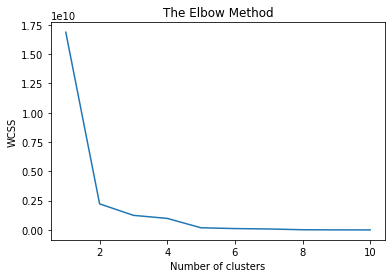

In [14]:
# get the best K
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=1, random_state=69)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
# End of for

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [15]:
best_k = 5
kmeans = KMeans(n_clusters=best_k)
y_predict = kmeans.fit_predict(X)
y_clusters = getTrueLabel(y_predict, y)
print("Silhouette Coefficient:", metrics.silhouette_score(X, y_predict))
print("Accuracy:", metrics.accuracy_score(y_clusters, y))

Silhouette Coefficient: 0.8175319164893884
Accuracy: 0.23833333333333334


## TSNE

In [16]:
X_reduced = TSNE(n_components=2, random_state=123).fit_transform(X)

## Kmeans Ploting in 2D

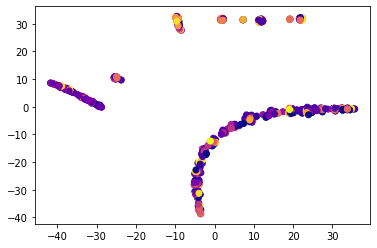

In [17]:
# The plotting of the data with the real classes
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap="plasma")

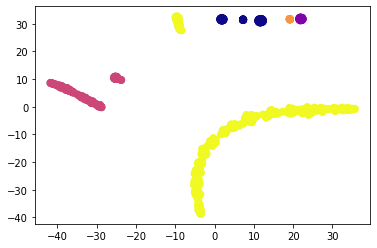

In [18]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_predict, s=50, cmap="plasma")

## Get the optimum number of nerouns SOM
#### Using Elbow WCSS

Text(0, 0.5, 'WCSS')

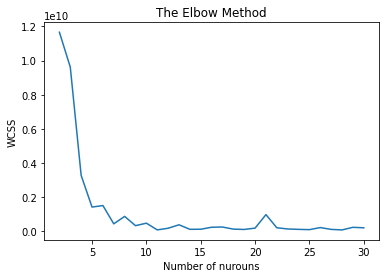

In [19]:
# get the best K
wcss = []
dim = X.shape[1]
for i in range(2, 31):
    som = SOM(m=i, n=1, dim=dim)
    som.fit(X)
    wcss.append(som.inertia_)
# End of for

plt.plot(range(2, 31), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of nurouns')
plt.ylabel('WCSS')

Silhouette Coefficient: 0.8673203010307191
Accuracy: 0.25


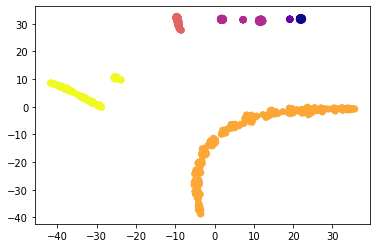

In [20]:
dim = X.shape[1]
poki_som = SOM(m=6, n=1, dim=dim)
poki_som.fit(X)
y_predict = poki_som.predict(X)
y_clusters = getTrueLabel(y_predict, y)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_predict, cmap="plasma")
print("Silhouette Coefficient:", metrics.silhouette_score(X, y_predict))
print("Accuracy:", metrics.accuracy_score(y_clusters, y))

#### Using Elbow Silhouette & Accuracy

best (accuracy) kn = 17
best (silhouette) kn = 14


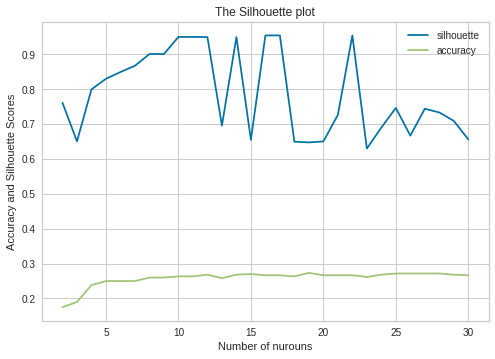

In [40]:
# get the best K
silhouette_scores = []
accuracy_scores = []
dim = X.shape[1]
for i in range(2, 31):
    som = SOM(m=i, n=1, dim=dim)
    som.fit(X)
    y_pred = som.predict(X)
    y_clusters = getTrueLabel(y_pred, y)
    val_sil = metrics.silhouette_score(X, y_pred)
    val_acc = metrics.accuracy_score(y_clusters, y)
    silhouette_scores.append(val_sil)
    accuracy_scores.append(val_acc)
# End of for

plt.plot(range(2, 31), silhouette_scores, label="silhouette")
plt.plot(range(2, 31), accuracy_scores, label="accuracy")
plt.title('The Silhouette plot')
plt.xlabel('Number of nurouns')
plt.ylabel('Accuracy and Silhouette Scores')
plt.legend()
best_n_acc = np.argmax(accuracy_scores)
best_n_sil = np.argmax(silhouette_scores)
print('best (accuracy) kn =', best_n_acc)
print('best (silhouette) kn =', best_n_sil)

Silhouette Coefficient: 0.9744251560548564
Accuracy: 0.27166666666666667


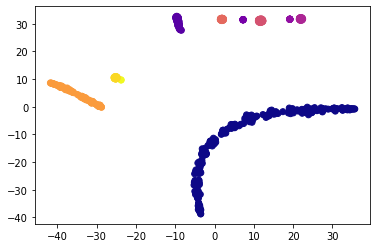

In [22]:
dim = X.shape[1]
poki_som = SOM(m=best_n_sil, n=1, dim=dim)
poki_som.fit(X)
y_predict = poki_som.predict(X)
y_clusters = getTrueLabel(y_predict, y)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_predict, cmap="plasma")
print("Silhouette Coefficient:", metrics.silhouette_score(X, y_predict))
print("Accuracy:", metrics.accuracy_score(y_clusters, y))

#### T-SNE Reduced Dimensions with applying SOM 

Text(0, 0.5, 'WCSS')

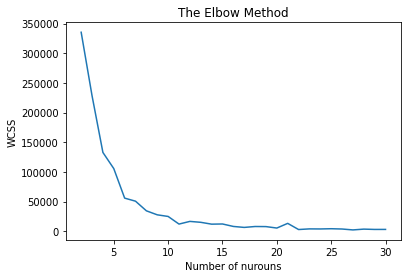

In [23]:
# get the best K
wcss = []
dim = X_reduced.shape[1]
for i in range(2, 31):
    som = SOM(m=i, n=1, dim=dim)
    som.fit(X_reduced)
    wcss.append(som.inertia_)
# End of for

plt.plot(range(2, 31), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of nurouns')
plt.ylabel('WCSS')

Silhouette Coefficient: 0.63209724
Accuracy: 0.235


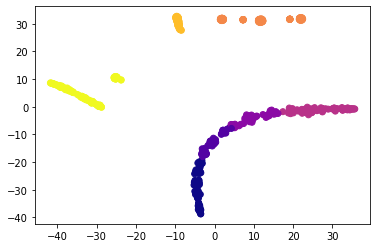

In [24]:
dim = X_reduced.shape[1]
poki_som = SOM(m=8, n=1, dim=dim)
poki_som.fit(X_reduced)
y_predict = poki_som.predict(X_reduced)
y_clusters = getTrueLabel(y_predict, y)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_predict, cmap="plasma")
print("Silhouette Coefficient:", metrics.silhouette_score(X_reduced, y_predict))
print("Accuracy:", metrics.accuracy_score(y_clusters, y))

## DBSCAN

### Tuning Phase (DBSCAN)

In [25]:
def tuneDBSCAN(tune_rate = 0.1):
    eps_vals = []
    min_points_vals = []
    num_clusters = []
    eps = tune_rate
    for min_p in range(1, 6):
        while(eps < min_p):
            dbscan = DBSCAN(eps=eps, min_samples = min_p)
            y_predict = dbscan.fit_predict(X)
            eps_vals.append(eps)
            min_points_vals.append(min_p)
            num_clusters.append(len(np.unique(y_predict)) - 1)
            eps += tune_rate
        # End Of while
    # End Of For
    return np.array(eps_vals), np.array(min_points_vals), np.array(num_clusters)
# End Of Func
e, p, c = tuneDBSCAN(tune_rate=0.01)

In [26]:
c_9 = np.where(c == 9)[0]
c_10 = np.where(c == 10)[0]
f_eps = 0
f_num_p = 0
try: 
    f_eps = e[c_10[0]]
    f_num_p = p[c_10[0]]
except:
    f_eps = e[c_9[0]]
    f_num_p = p[c_9[0]]
# End Try
print('the nearest paramters to get 10 clusters after tuning:')
print('eps=', f_eps)
print('min_points=', f_num_p)

the nearest paramters to get 10 clusters after tuning:
eps= 4.90999999999994
min_points= 5


### Tuning Results 3D Plotting

In [27]:
fig = go.Figure(data=[go.Scatter3d(x=e, y=p, z=c)])
fig.update_layout(scene = dict(
    xaxis_title='Epsilon Values',
    yaxis_title='Min Number Of Point Per Cluster',
    zaxis_title='Number Of Cluster'),
    width=700,
    margin=dict(r=20, b=10, l=10, t=10)
)
fig.show()

### Modeling Phase (DBSCAN)

Silhouette Coefficient: 0.06272461850083305
Accuracy: 0.23166666666666666


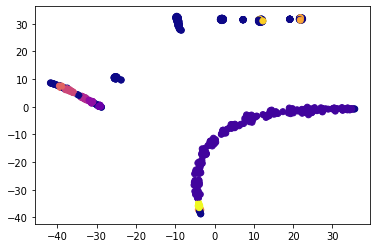

In [28]:
dbscan = DBSCAN(eps = f_eps, min_samples = f_num_p)
y_predict = dbscan.fit_predict(X)
y_clusters = getTrueLabel(y_predict, y)
print("Silhouette Coefficient:", metrics.silhouette_score(X, y_predict))
print("Accuracy:", metrics.accuracy_score(y_clusters, y))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_predict, cmap="plasma")